In [1]:
import pandas as pd
import plotly.express as px


## Exploratory Analysis

In [2]:
training_df =  pd.read_csv("../Data/dataset_for_traffic_project_assignment/training_dataset.csv", sep=";")

evaluation_df = pd.read_csv("../Data/dataset_for_traffic_project_assignment/evaluation_dataset.csv", sep=";")

final_df = pd.read_csv("../Data/dataset_for_traffic_project_assignment/final_evaluation_dataset.csv", sep=";")

final_df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,4872,"E4S 56,780",20220105,04:00:00,240,48,16,8,4,17.50,1.0
1,4430,"E4S 57,435",20220105,04:00:00,240,48,16,8,4,24.44,1.0
2,4436,"E4S 57,820",20220105,04:00:00,240,48,16,8,4,23.61,1.0
3,1079,"E4S 56,780",20220105,04:00:00,240,48,16,8,4,23.75,2.0
4,1076,"E4S 55,620",20220105,04:00:00,240,48,16,8,4,21.30,3.0
...,...,...,...,...,...,...,...,...,...,...,...
803496,1079,"E4S 56,780",20220630,10:00:00,600,120,40,20,10,16.77,20.0
803497,1443,"E4S 57,055",20220630,10:00:00,600,120,40,20,10,20.94,24.0
803498,902,"E4S 56,490",20220630,10:00:00,600,120,40,20,10,18.21,19.0
803499,1076,"E4S 55,620",20220630,10:00:00,600,120,40,20,10,17.53,22.0


In [3]:
unique_count = final_df["PORTAL"].nunique()
print("Number of unique PORTAL entries:", unique_count)



Number of unique PORTAL entries: 8


In [4]:
evaluation_df["datetime"] = pd.to_datetime(evaluation_df["Date"].astype(str) + " " + evaluation_df["Time"])
plot_evaluation_df = evaluation_df[:1000][evaluation_df["PORTAL"] == "E4S 55,620"]

dp_count = plot_evaluation_df["DP_ID"].nunique()
print("Number of unique dp_ids per portal:", dp_count)


# Create interactive line plot
fig = px.scatter(
    plot_evaluation_df,
    x="datetime",
    y=["FLOW"],
    labels={"value": "Value", "variable": "Metric"},
    title="Average Speed and Flow over Time"
)

fig.show()

plot_evaluation_df

/var/folders/ww/hnj0z7l577b2_jzdg6515pfm0000gn/T/ipykernel_9646/1113987364.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_evaluation_df = evaluation_df[:1000][evaluation_df["PORTAL"] == "E4S 55,620"]


Number of unique dp_ids per portal: 3


,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,datetime
0,1254,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,26.40,1.0,2022-01-01 04:00:00
3,1076,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,18.55,4.0,2022-01-01 04:00:00
4,751,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,22.19,7.0,2022-01-01 04:00:00
43,1076,"E4S 55,620",20220101,04:01:00,241,48,16,8,4,24.35,4.0,2022-01-01 04:01:00
44,751,"E4S 55,620",20220101,04:01:00,241,48,16,8,4,20.83,4.0,2022-01-01 04:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...
964,1076,"E4S 55,620",20220101,04:43:00,283,56,18,9,4,21.63,3.0,2022-01-01 04:43:00
965,751,"E4S 55,620",20220101,04:43:00,283,56,18,9,4,22.40,3.0,2022-01-01 04:43:00
969,1254,"E4S 55,620",20220101,04:43:00,283,56,18,9,4,23.60,1.0,2022-01-01 04:43:00
972,1076,"E4S 55,620",20220101,04:44:00,284,56,18,9,4,22.30,3.0,2022-01-01 04:44:00


## Preprocessing

### Data Cleaning

In [5]:
# 1. Check amount of NaNs in each column
print("NaN counts per column:")
print(evaluation_df.isna().sum())

# 2. Check for duplicate entries (same DP_ID, PORTAL, Date, Time)
dup_mask = evaluation_df.duplicated(subset=["DP_ID", "PORTAL", "Date", "Time"], keep=False)
num_duplicates = dup_mask.sum()
print("\nNumber of duplicate rows (same DP_ID, PORTAL, Date, Time):", num_duplicates)

# 3. Min/Max values of SPEED_MS_AVG and FLOW
print("\nSPEED_MS_AVG: min =", evaluation_df["SPEED_MS_AVG"].min(), 
      ", max =", evaluation_df["SPEED_MS_AVG"].max())

print("FLOW: min =", evaluation_df["FLOW"].min(), 
      ", max =", evaluation_df["FLOW"].max())


NaN counts per column:
DP_ID            0
PORTAL           0
Date             0
Time             0
Interval_1       0
Interval_5       0
Interval_15      0
Interval_30      0
Interval_60      0
SPEED_MS_AVG     0
FLOW            29
datetime         0
dtype: int64

Number of duplicate rows (same DP_ID, PORTAL, Date, Time): 0

SPEED_MS_AVG: min = 0.0 , max = 43.1
FLOW: min = 1.0 , max = 44.0


In [6]:
# drop NaNs in target variable
clean_evaluation_df = evaluation_df.dropna(subset=["FLOW"])


In [7]:
# Ensure a proper timestamp (optional but helpful for sorting)
clean_evaluation_df = clean_evaluation_df.copy()
clean_evaluation_df["timestamp"] = pd.to_datetime(
    clean_evaluation_df["Date"].astype(str) + " " + clean_evaluation_df["Time"].astype(str),
    format="%Y%m%d %H:%M:%S"
)

# Sort within groups so rolling uses the correct temporal order
clean_evaluation_df = clean_evaluation_df.sort_values(["PORTAL", "DP_ID", "timestamp"])



In [8]:
clean_evaluation_df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,datetime,timestamp
4,751,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,22.19,7.0,2022-01-01 04:00:00,2022-01-01 04:00:00
44,751,"E4S 55,620",20220101,04:01:00,241,48,16,8,4,20.83,4.0,2022-01-01 04:01:00,2022-01-01 04:01:00
52,751,"E4S 55,620",20220101,04:02:00,242,48,16,8,4,22.98,4.0,2022-01-01 04:02:00,2022-01-01 04:02:00
85,751,"E4S 55,620",20220101,04:03:00,243,48,16,8,4,22.30,3.0,2022-01-01 04:03:00,2022-01-01 04:03:00
94,751,"E4S 55,620",20220101,04:04:00,244,48,16,8,4,24.30,4.0,2022-01-01 04:04:00,2022-01-01 04:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803126,4496,"E4S 58,140",20220625,09:50:00,590,118,39,19,9,15.56,1.0,2022-06-25 09:50:00,2022-06-25 09:50:00
803172,4496,"E4S 58,140",20220625,09:52:00,592,118,39,19,9,20.28,1.0,2022-06-25 09:52:00,2022-06-25 09:52:00
803267,4496,"E4S 58,140",20220625,09:56:00,596,119,39,19,9,18.89,2.0,2022-06-25 09:56:00,2022-06-25 09:56:00
803307,4496,"E4S 58,140",20220625,09:57:00,597,119,39,19,9,18.61,2.0,2022-06-25 09:57:00,2022-06-25 09:57:00


### Basic Transformations

In [9]:
import numpy as np
import pandas as pd

# --- config ---
STRICT = False   # set True to raise an error instead of proceeding when conflicts exist

#df = evaluation_df.copy()

# Keys for aggregation (per your spec)
group_keys = ["PORTAL", "Date", "Time"]

# Columns that will be aggregated
value_cols = ["FLOW", "SPEED_MS_AVG"]

# Columns that must be identical within each (PORTAL, Date, Time) group
const_cols = [c for c in clean_evaluation_df.columns if c not in set(group_keys + value_cols + ["DP_ID"])]

# 1) Check for conflicts: any const col with >1 unique value within a group
nunique_per_group = (
    clean_evaluation_df.groupby(group_keys)[const_cols].nunique(dropna=False)
    if const_cols else pd.DataFrame(index=clean_evaluation_df.groupby(group_keys).size().index)
)

conflict_mask = (nunique_per_group > 1).any(axis=1) if not nunique_per_group.empty else pd.Series(False, index=df.groupby(group_keys).size().index)
num_conflicting_groups = int(conflict_mask.sum())

print(f"[Check] Groups with conflicting non-aggregated fields: {num_conflicting_groups}")

# 2) Aggregation helpers
def weighted_mean_speed(g: pd.DataFrame) -> float:
    w = g["FLOW"].values
    x = g["SPEED_MS_AVG"].values
    wsum = np.nansum(w)
    if wsum > 0:
        return float(np.nansum(x * w) / wsum)
    # fallback if all flows are zero/NaN
    return float(np.nanmean(x))

# 3) Build the aggregated rows
def aggregate_group(g: pd.DataFrame) -> pd.Series:
    out = {}
    # keep group keys as columns (groupby will provide them in the index)
    # constants: take the first (they should be identical; we already warned if not)
    for c in const_cols:
        out[c] = g[c].iloc[0]
    # aggregations
    out["FLOW"] = g["FLOW"].sum(skipna=True)
    out["SPEED_MS_AVG"] = weighted_mean_speed(g)
    return pd.Series(out)

agg_df = (
    clean_evaluation_df.groupby(group_keys, as_index=False)
      .apply(aggregate_group)
      .reset_index(drop=True)
)

# DP_ID is removed by construction (we aggregate over it)
print("[Done] Aggregated over DP_ID within each (PORTAL, Date, Time).")
print("Result shape:", agg_df.shape)
print("Columns:", list(agg_df.columns))


[Check] Groups with conflicting non-aggregated fields: 0
[Done] Aggregated over DP_ID within each (PORTAL, Date, Time).
Result shape: (250270, 12)
Columns: ['PORTAL', 'Date', 'Time', 'Interval_1', 'Interval_5', 'Interval_15', 'Interval_30', 'Interval_60', 'datetime', 'timestamp', 'FLOW', 'SPEED_MS_AVG']


/var/folders/ww/hnj0z7l577b2_jzdg6515pfm0000gn/T/ipykernel_9646/2681327749.py:53: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [10]:
agg_df

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,datetime,timestamp,FLOW,SPEED_MS_AVG
0,"E4S 55,620",20220101,04:00:00,240,48,16,8,4,2022-01-01 04:00:00,2022-01-01 04:00:00,12.0,21.327500
1,"E4S 55,620",20220101,04:01:00,241,48,16,8,4,2022-01-01 04:01:00,2022-01-01 04:01:00,9.0,22.580000
2,"E4S 55,620",20220101,04:02:00,242,48,16,8,4,2022-01-01 04:02:00,2022-01-01 04:02:00,7.0,22.375714
3,"E4S 55,620",20220101,04:03:00,243,48,16,8,4,2022-01-01 04:03:00,2022-01-01 04:03:00,3.0,22.300000
4,"E4S 55,620",20220101,04:04:00,244,48,16,8,4,2022-01-01 04:04:00,2022-01-01 04:04:00,7.0,23.370000
...,...,...,...,...,...,...,...,...,...,...,...,...
250265,"E4S 58,140",20220625,09:56:00,596,119,39,19,9,2022-06-25 09:56:00,2022-06-25 09:56:00,22.0,22.123636
250266,"E4S 58,140",20220625,09:57:00,597,119,39,19,9,2022-06-25 09:57:00,2022-06-25 09:57:00,13.0,21.793077
250267,"E4S 58,140",20220625,09:58:00,598,119,39,19,9,2022-06-25 09:58:00,2022-06-25 09:58:00,27.0,22.252963
250268,"E4S 58,140",20220625,09:59:00,599,119,39,19,9,2022-06-25 09:59:00,2022-06-25 09:59:00,18.0,22.191111


In [11]:
print("Unique portals in agg_df:")
print(agg_df["PORTAL"].unique())

Unique portals in agg_df:
['E4S 55,620' 'E4S 56,160' 'E4S 56,490' 'E4S 56,780' 'E4S 57,055'
 'E4S 57,435' 'E4S 57,820' 'E4S 58,140']


In [12]:
import re

# 1) Extract numeric part (e.g. "E4S 56,780" -> 56780)
# Robust extraction: capture the trailing number block (like "55,620" or "56160")
num_str = agg_df["PORTAL"].str.extract(r'(\d{2},\d{3}|\d+)$', expand=False)
agg_df["PORTAL_NUM"] = num_str.str.replace(",", "", regex=False).astype(int)

# Quick sanity check: each portal should map to exactly one numeric value
print(agg_df.groupby("PORTAL")["PORTAL_NUM"].nunique())
print(agg_df[["PORTAL", "PORTAL_NUM"]].drop_duplicates().sort_values("PORTAL"))

# 2) Define portal groups (based on your plan: 1, 2, (3+4), (5–8))
portal_group_map = {
    'E4S 55,620': 1,
    'E4S 56,160': 2,
    'E4S 56,490': 3,
    'E4S 56,780': 3,
    'E4S 57,055': 4,
    'E4S 57,435': 4,
    'E4S 57,820': 4,
    'E4S 58,140': 4
}
agg_df["PORTAL_GROUP"] = agg_df["PORTAL"].map(portal_group_map)



PORTAL
E4S 55,620    1
E4S 56,160    1
E4S 56,490    1
E4S 56,780    1
E4S 57,055    1
E4S 57,435    1
E4S 57,820    1
E4S 58,140    1
Name: PORTAL_NUM, dtype: int64
            PORTAL  PORTAL_NUM
0       E4S 55,620       55620
31527   E4S 56,160       56160
63053   E4S 56,490       56490
95385   E4S 56,780       56780
127695  E4S 57,055       57055
159242  E4S 57,435       57435
191165  E4S 57,820       57820
218036  E4S 58,140       58140


In [13]:
agg_df[["PORTAL", "PORTAL_NUM", "PORTAL_GROUP"]].drop_duplicates()

,PORTAL,PORTAL_NUM,PORTAL_GROUP
0,"E4S 55,620",55620,1
31527,"E4S 56,160",56160,2
63053,"E4S 56,490",56490,3
95385,"E4S 56,780",56780,3
127695,"E4S 57,055",57055,4
159242,"E4S 57,435",57435,4
191165,"E4S 57,820",57820,4
218036,"E4S 58,140",58140,4


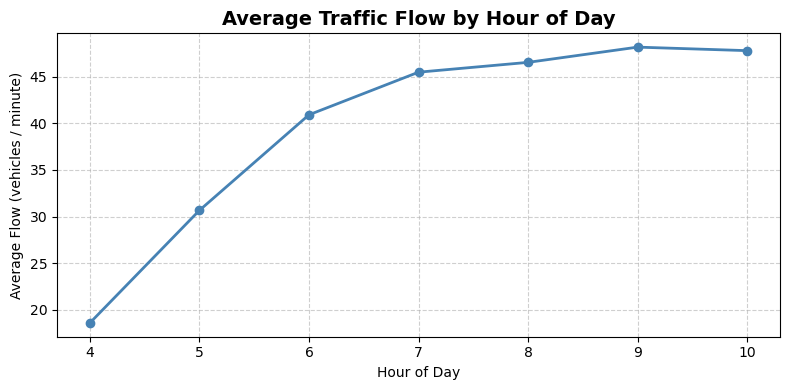

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Convert timestamp to datetime if not already ---
agg_df["timestamp"] = pd.to_datetime(agg_df["timestamp"])

# --- 2) Extract hour of day ---
agg_df["hour"] = agg_df["timestamp"].dt.hour

# --- 3) Group by hour and compute average flow ---
hourly_flow = agg_df.groupby("hour")["FLOW"].mean().reset_index()

# --- 4) Plot ---
plt.figure(figsize=(8,4))
plt.plot(hourly_flow["hour"], hourly_flow["FLOW"], marker="o", linewidth=2, color="steelblue")
plt.title("Average Traffic Flow by Hour of Day", fontsize=14, weight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Average Flow (vehicles / minute)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(4, 11))  
plt.tight_layout()
plt.show()


## Export

In [15]:
# Save agg_df to CSV
agg_df.to_csv("../Data/evaluation_dataset_preprocessed.csv", index=False, sep=";")

print("Saved agg_df")


Saved agg_df
